In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,67880,None,None,86085.715275
2020-06-13,67881,None,None,79940.811469
2020-06-14,67882,None,None,74244.112992
2020-06-15,67883,None,None,68878.187593
2020-06-16,67884,None,None,64137.552455
...,...,...,...,...
2021-06-10,68243,None,None,134117.662975
2021-06-11,68244,None,None,143842.474968
2021-06-12,68245,None,None,153363.071550


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-06-14_2021-06-14-17-13.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-06-13_2021-06-13-19-21.pickle


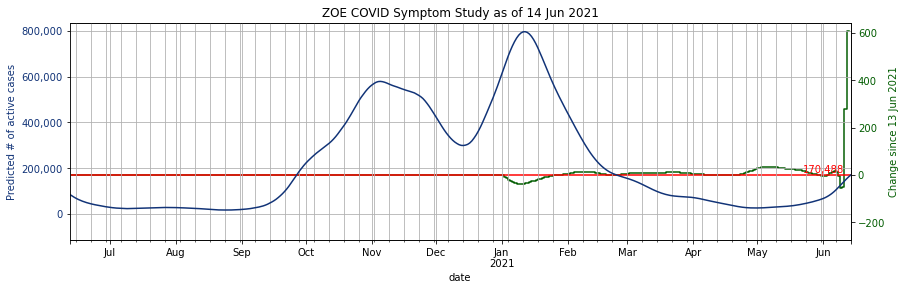

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

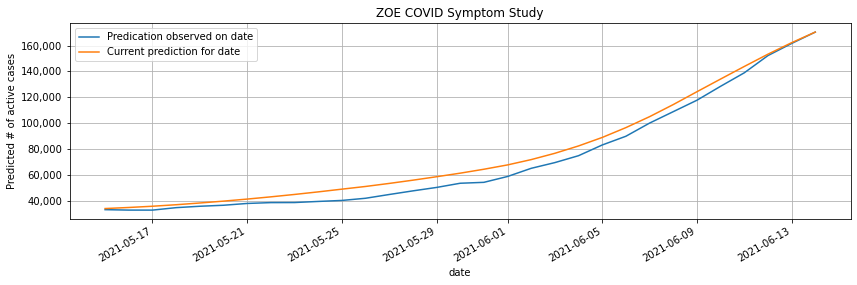

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-06-14_2021-06-14-17-13.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
266,Bolton,E08000001,2.489994
269,Rochdale,E08000005,1.935195
317,Renfrewshire,S12000038,1.791959
270,Salford,E08000006,1.720519
308,Perth and Kinross,S12000024,1.710031
71,South Derbyshire,E07000039,1.655050
171,Preston,E07000123,1.600547
164,Chorley,E07000118,1.268581
351,Hillingdon,E09000017,1.090173
54,Luton,E06000032,1.025736
